# 기본설치

In [2]:
! pip install folium
! pip install googlemaps

In [3]:
! pip install seaborn

In [4]:
! pip install pandas

In [5]:
import pandas as pd
import numpy as np
import folium
import googlemaps

In [6]:
import folium.plugins as plugins

In [7]:
%pwd

'C:\\Users\\SBAUser\\Jupyter_Python'

#  혼잡도 그래프

## 19년도 혼잡도

### csv 불러오기

혼잡도의 경우 : 정원대비 승차인원으로, 승차인과 좌석수가 일치할 경우를 혼잡도 34%로 산정이며 2년주기로 업데이트하기때문에 19년도, 21년도만 비교

In [638]:
#19년도 혼잡도
df19=pd.read_csv('./data/서울교통공사_혼잡도_20191231.csv',encoding='euc-kr')
df19.head()

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,24시00분,24시30분
0,평일,1호선,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,...,15.1,15.9,17.1,16,19,15.2,10.5,7.8,6,0.9
1,평일,1호선,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,...,36.5,31.2,37.6,44.6,45.6,37.8,28.8,19.3,7.1,0.4
2,평일,1호선,151,시청,상선,7.7,11.2,19.6,24.4,36.2,...,18.7,18.3,20.7,22,24,18.7,13.7,10,6.9,1.0
3,평일,1호선,151,시청,하선,9.5,11.3,11.6,16.7,23.2,...,32,27.7,34.8,39.3,37.4,36.3,23,18.1,4,1.6
4,평일,1호선,152,종각,상선,6.3,8.1,15.5,16.6,22.7,...,25.8,24.2,30,31.9,34,26.8,18.8,12.5,9.1,1.2


### 필요없는부분 삭제하기

In [639]:
df19.columns[0:15]


Index(['조사일자', '호선', '역번호', '역명', '구분', '5시30분', '6시00분', '6시30분', '7시00분',
       '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분'],
      dtype='object')

In [640]:
df19v2=df19.iloc[:,0:15]
df19v2

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분
0,평일,1호선,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,70,74.5,52.2,57.1,38.5
1,평일,1호선,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,34.8,25.2,21,17,16.4
2,평일,1호선,151,시청,상선,7.7,11.2,19.6,24.4,36.2,53.7,51.7,47.1,47.1,37.4
3,평일,1호선,151,시청,하선,9.5,11.3,11.6,16.7,23.2,34.1,26.4,21,16.8,16.4
4,평일,1호선,152,종각,상선,6.3,8.1,15.5,16.6,22.7,34.8,28.7,32.4,35,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,일요일,8호선,2825,신흥,하선,6.9,3.4,4,2.8,6.3,5.4,6,8.2,9.3,10.5
1664,일요일,8호선,2826,수진,상선,2.4,2.2,2.2,2.2,2.5,3.3,4.1,5.6,7.1,5.7
1665,일요일,8호선,2826,수진,하선,11,3.7,3.2,2.6,4.1,5.5,5.8,7.6,9.4,10
1666,일요일,8호선,2827,모란,상선,1.8,2,1.7,1.7,1.8,2.1,3.1,3.2,5,4


In [ ]:
''

In [641]:
df19v3=df19v2[df19v2['조사일자']=='평일']
df19v3

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분
0,평일,1호선,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,70,74.5,52.2,57.1,38.5
1,평일,1호선,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,34.8,25.2,21,17,16.4
2,평일,1호선,151,시청,상선,7.7,11.2,19.6,24.4,36.2,53.7,51.7,47.1,47.1,37.4
3,평일,1호선,151,시청,하선,9.5,11.3,11.6,16.7,23.2,34.1,26.4,21,16.8,16.4
4,평일,1호선,152,종각,상선,6.3,8.1,15.5,16.6,22.7,34.8,28.7,32.4,35,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,평일,8호선,2825,신흥,하선,14.7,7.5,8.2,9.2,11.9,21.9,14,10.5,9.2,8.4
552,평일,8호선,2826,수진,상선,4.9,4.1,3.7,4.2,6.7,14.3,12.6,11.4,8.9,8.7
553,평일,8호선,2826,수진,하선,21.1,8.1,9.5,9.8,12.5,20.6,13.8,10.7,9.5,8.6
554,평일,8호선,2827,모란,상선,2.5,2.6,2.5,2.1,3,8.8,9.2,7.5,7.5,6.8


In [696]:
df19v4=df19v3.astype({'5시30분':'float','6시00분':'float','6시30분':'float','7시00분':'float','7시30분':'float','8시00분':'float','8시30분':'float','9시00분':'float','9시30분':'float','10시00분':'float'}).dtypes

In [720]:
df21v4['5시30분'].describe()['mean']

35.929

In [667]:
# df19v4=df19v3.sort_values(by='8시00분',ascending=False).head(100)

In [666]:
# df19v4

In [ ]:
1) 100개의 혼잡도를 평균내서 시간별 혼잡도를 구해서 몇시가 가장 혼잡한지 표현.
2) 그 시간대를 토대로 가장 혼잡한 10개역을 표현.
3) 출근시간 퇴근시간 별로.

## 21년도 혼잡도

### csv 불러오기

In [630]:
df21=pd.read_csv('./data/서울교통공사_지하철혼잡도정보_20211231.csv',encoding='euc-kr')
df21.head()

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8


### 필요없는부분 삭제하기

In [633]:
df21v2=df21.iloc[:,0:15]
df21

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,38.0
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,29.3,27.7,19.0,18.5,15.1
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,40.6,50.9,30.8,35.8
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,27.0,24.7,20.0,18.4,14.5
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,25.5,26.5,19.2,26.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1700,일요일,8,2825,신흥,하선,7.0,3.0,2.2,2.1,2.6,3.7,3.7,5.4,5.2
1700,1701,일요일,8,2826,수진,상선,2.4,1.5,3.2,2.2,2.2,2.7,3.1,3.8,5.0
1701,1702,일요일,8,2826,수진,하선,9.3,4.1,2.6,2.1,3.1,4.3,4.5,5.5,6.0
1702,1703,일요일,8,2827,모란,상선,1.6,0.9,2.5,1.3,1.2,1.6,2.1,2.8,3.6


In [635]:
df21v2=df21[df21['조사일자']=='평일']
df21v2

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,38.0
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,29.3,27.7,19.0,18.5,15.1
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,40.6,50.9,30.8,35.8
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,27.0,24.7,20.0,18.4,14.5
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,25.5,26.5,19.2,26.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,564,평일,8,2825,신흥,하선,11.3,6.9,8.1,9.9,10.1,16.1,11.1,8.4,7.9
564,565,평일,8,2826,수진,상선,4.7,3.4,3.6,3.8,6.0,12.6,9.8,9.7,6.5
565,566,평일,8,2826,수진,하선,15.6,8.1,8.6,10.9,11.0,16.2,11.6,9.0,8.3
566,567,평일,8,2827,모란,상선,2.4,1.9,2.1,1.7,2.6,7.2,6.2,5.8,5.4


In [636]:
df21v3=df21v2[df21v2['조사일자']=='평일']
df21v3

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,38.0
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,29.3,27.7,19.0,18.5,15.1
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,32.0,40.6,50.9,30.8,35.8
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,27.0,24.7,20.0,18.4,14.5
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,19.6,25.5,26.5,19.2,26.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,564,평일,8,2825,신흥,하선,11.3,6.9,8.1,9.9,10.1,16.1,11.1,8.4,7.9
564,565,평일,8,2826,수진,상선,4.7,3.4,3.6,3.8,6.0,12.6,9.8,9.7,6.5
565,566,평일,8,2826,수진,하선,15.6,8.1,8.6,10.9,11.0,16.2,11.6,9.0,8.3
566,567,평일,8,2827,모란,상선,2.4,1.9,2.1,1.7,2.6,7.2,6.2,5.8,5.4


In [645]:
df21v4=df21v3.sort_values(by='8시00분',ascending=False).head(100)  # 가장 바쁜 시간대인 8시00분으로 기준
df21v4

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분
211,212,평일,4,419,한성대입구,하선,43.7,35.3,44.2,65.2,95.0,150.8,113.1,88.1,68.2
209,210,평일,4,418,성신여대입구,하선,54.9,34.2,42.9,69.0,95.5,150.6,106.9,85.8,64.1
213,214,평일,4,420,혜화,하선,44.9,34.6,42.2,62.4,90.4,141.6,108.2,89.8,65.9
135,136,평일,3,315,무악재,하선,35.4,33.2,45.2,65.4,96.2,140.6,114.0,76.4,53.4
207,208,평일,4,417,길음,하선,52.7,29.8,42.0,65.7,88.3,140.6,98.5,76.8,56.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,21,평일,2,201,시청,내선,15.3,18.8,22.4,36.7,45.7,85.7,68.6,38.3,33.6
312,313,평일,5,2546,아차산,상선,24.8,23.2,41.0,48.9,63.6,85.6,70.5,61.2,49.3
318,319,평일,5,2549,강동,상선,17.5,26.4,37.5,50.3,52.1,85.6,61.5,62.0,35.1
84,85,평일,2,233,대림,내선,77.1,49.9,29.4,39.6,60.3,85.5,59.1,47.3,29.9


In [644]:
df21v4.head(100)

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분
211,212,평일,4,419,한성대입구,하선,43.7,35.3,44.2,65.2,95.0,150.8,113.1,88.1,68.2
209,210,평일,4,418,성신여대입구,하선,54.9,34.2,42.9,69.0,95.5,150.6,106.9,85.8,64.1
213,214,평일,4,420,혜화,하선,44.9,34.6,42.2,62.4,90.4,141.6,108.2,89.8,65.9
135,136,평일,3,315,무악재,하선,35.4,33.2,45.2,65.4,96.2,140.6,114.0,76.4,53.4
207,208,평일,4,417,길음,하선,52.7,29.8,42.0,65.7,88.3,140.6,98.5,76.8,56.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,21,평일,2,201,시청,내선,15.3,18.8,22.4,36.7,45.7,85.7,68.6,38.3,33.6
312,313,평일,5,2546,아차산,상선,24.8,23.2,41.0,48.9,63.6,85.6,70.5,61.2,49.3
318,319,평일,5,2549,강동,상선,17.5,26.4,37.5,50.3,52.1,85.6,61.5,62.0,35.1
84,85,평일,2,233,대림,내선,77.1,49.9,29.4,39.6,60.3,85.5,59.1,47.3,29.9


19년도보다 21년도에 혼잡도가 많은 것처럼 보이지만  19년도의 최대치가 100%를 넘지않는것을 보면 상당히 보수적으로 작성했다고 볼 수 있다.

승하차총인원과 혼잡도는 관계가 없어보인다? 어쩌면 사람들이 가장많이 타는게 모여서 데이터화된것?

상관계수 구해보기도 괜찮을지도? 

### 21년도 혼잡도 그래프

In [175]:
import pandas as pd
import numpy as np
import folium
import googlemaps
import folium.plugins as plugins
import matplotlib.pyplot as plt

In [176]:
plt.figure(figsize=(100,50))
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(100,50))
#글씨체 조정
font_path = 'C:\Windows\Fonts\Malgun.ttf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()
plt.rcParams['font.family']=fontname

<Figure size 10000x5000 with 0 Axes>

<Figure size 10000x5000 with 0 Axes>

In [178]:
# -------------------------------------------------------------코드시작--------------------------
df21=pd.read_csv('./data/서울교통공사_지하철혼잡도정보_20211231.csv',encoding='euc-kr')
df21.head()

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8


In [182]:
df21v1=df21.iloc[:,:16] # columns 10시까지만
df21v2=df21v1[df21v1['조사일자']=='평일'] # 평일만 추출
df21v3=df21v2.sort_values(by='8시00분',ascending=False).head(100)  # 가장 바쁜 시간대인 8시00분으로 기준
df21v4 = df21v3.iloc[:,1:] # column : '연번' 제거하기
mean_list = df21v4.iloc[:,5:].mean().to_list()# 시간별 혼잡도의 평균값을 리스트로 전환
mean_list2 = ['','','','','혼잡도 평균'] + mean_list # 열 개수 맟추기
lst_c = [ '5시30분', '6시00분', '6시30분', '7시00분',
       '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분']

In [183]:
df21v5=df21v4.reset_index(drop=True, inplace = False ) # index초기화
df21v5.loc[100]= mean_list2 # 마지막행에 평균값 추가
df21v5

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분
0,평일,4,419,한성대입구,하선,43.700,35.300,44.200,65.20,95.00,150.800,113.100,88.100,68.200,51.600
1,평일,4,418,성신여대입구,하선,54.900,34.200,42.900,69.00,95.50,150.600,106.900,85.800,64.100,50.200
2,평일,4,420,혜화,하선,44.900,34.600,42.200,62.40,90.40,141.600,108.200,89.800,65.900,51.900
3,평일,3,315,무악재,하선,35.400,33.200,45.200,65.40,96.20,140.600,114.000,76.400,53.400,47.000
4,평일,4,417,길음,하선,52.700,29.800,42.000,65.70,88.30,140.600,98.500,76.800,56.700,46.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,평일,5,2546,아차산,상선,24.800,23.200,41.000,48.90,63.60,85.600,70.500,61.200,49.300,37.400
97,평일,5,2549,강동,상선,17.500,26.400,37.500,50.30,52.10,85.600,61.500,62.000,35.100,42.900
98,평일,2,233,대림,내선,77.100,49.900,29.400,39.60,60.30,85.500,59.100,47.300,29.900,19.100
99,평일,5,2520,신정,하선,25.300,20.100,28.300,47.40,62.90,85.400,76.900,57.800,40.800,32.600


<function matplotlib.pyplot.show(close=None, block=None)>

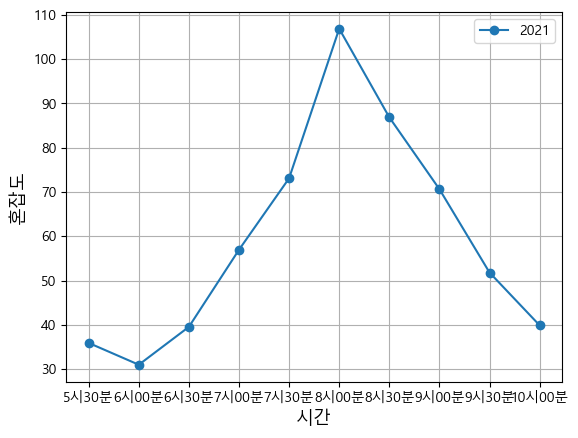

In [184]:
x_values = lst_c
y_values = df21v5.iloc[100,5:].to_list()
p22 = plt.plot(x_values,y_values,label='2021',marker='o')
plt.xlabel('시간', size = 13)
plt.ylabel('혼잡도', size = 13)
plt.legend()
plt.grid()
plt.show

## 19년도 , 21년도 혼잡도 비교

# 지하철역 코로나 이전 이후 출근시간

## 파일불러오기

In [7]:
sp = pd.read_csv('./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보1205 (2).csv', encoding='euc-kr')

In [8]:
sp

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202211,1호선,동대문,728,4,10942,1871,8782,6391,14368,...,7946,518,2191,5,206,0,1,0,0,20221203
1,202211,1호선,동묘앞,205,4,3082,1052,3731,4674,6555,...,3580,89,1322,2,332,0,1,0,0,20221203
2,202211,1호선,서울역,698,24,8634,8662,13165,49665,42055,...,13413,2321,2639,2,192,0,0,0,0,20221203
3,202211,1호선,시청,121,0,2050,4369,3391,23225,7286,...,3194,872,850,1,26,0,0,0,0,20221203
4,202211,1호선,신설동,372,15,9256,2278,9260,8707,20784,...,7874,370,2070,1,6,0,0,0,0,20221203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55721,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
55722,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
55723,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
55724,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


## 필요없는 부분 삭제하기

In [63]:
sp

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202211,1호선,동대문,728,4,10942,1871,8782,6391,14368,...,7946,518,2191,5,206,0,1,0,0,20221203
1,202211,1호선,동묘앞,205,4,3082,1052,3731,4674,6555,...,3580,89,1322,2,332,0,1,0,0,20221203
2,202211,1호선,서울역,698,24,8634,8662,13165,49665,42055,...,13413,2321,2639,2,192,0,0,0,0,20221203
3,202211,1호선,시청,121,0,2050,4369,3391,23225,7286,...,3194,872,850,1,26,0,0,0,0,20221203
4,202211,1호선,신설동,372,15,9256,2278,9260,8707,20784,...,7874,370,2070,1,6,0,0,0,0,20221203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55721,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
55722,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
55723,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
55724,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


In [9]:
sp.columns[0:15]

Index(['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원'],
      dtype='object')

In [10]:
sp2=sp.loc[:,['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원']]

In [11]:
sp2

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원
0,202211,1호선,동대문,728,4,10942,1871,8782,6391,14368,11493,20005,21825,18561,22349
1,202211,1호선,동묘앞,205,4,3082,1052,3731,4674,6555,8851,11419,21633,9128,18442
2,202211,1호선,서울역,698,24,8634,8662,13165,49665,42055,109445,71945,219435,60879,160791
3,202211,1호선,시청,121,0,2050,4369,3391,23225,7286,68121,9263,195016,11983,101983
4,202211,1호선,신설동,372,15,9256,2278,9260,8707,20784,24027,31812,57914,20507,33623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55721,201501,중앙선,운길산,0,0,177,56,642,403,1292,675,1479,1390,1438,3270
55722,201501,중앙선,원덕,1,0,292,4,415,46,537,248,823,344,980,273
55723,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,3027,25792,6573,14328,6133
55724,201501,중앙선,팔당,0,0,161,50,368,149,1227,523,910,1151,897,2931


In [12]:
sp2.dtypes

사용월              int64
호선명             object
지하철역            object
04시-05시 승차인원     int64
04시-05시 하차인원     int64
05시-06시 승차인원     int64
05시-06시 하차인원     int64
06시-07시 승차인원     int64
06시-07시 하차인원     int64
07시-08시 승차인원     int64
07시-08시 하차인원     int64
08시-09시 승차인원     int64
08시-09시 하차인원     int64
09시-10시 승차인원     int64
09시-10시 하차인원     int64
dtype: object

In [27]:
# 201901<=sp2<=202112

In [43]:
# Data1 = Data1.drop("Weight", axis = 1)

In [14]:
sp3=sp2[sp2["사용월"] >= 201901] 
sp4=sp3[sp3["사용월"] <= 202112]
sp4

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원
6740,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,10014,18832,21879,16495,20889
6741,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,7362,8890,18151,7427,14958
6742,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,85455,55770,188733,43790,121596
6743,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,56046,7816,168744,8475,78172
6744,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,21124,24588,58444,16025,32087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28389,201901,중앙선,원덕,30,0,233,7,466,60,860,185,1154,446,1355,336
28390,201901,중앙선,중랑,38,0,5443,362,8673,2274,23633,3783,24214,6937,13589,4812
28391,201901,중앙선,지평,0,0,0,0,0,0,187,138,142,53,2,0
28392,201901,중앙선,팔당,2,0,205,31,449,385,1264,837,1315,1733,1021,3260


In [15]:
sp4=sp4.drop('04시-05시 승차인원',axis=1)

In [16]:
sp4=sp4.drop('04시-05시 하차인원',axis=1)

In [17]:
sp4.head()

,사용월,호선명,지하철역,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원
6740,202112,1호선,동대문,12276,1913,8716,5492,13464,10014,18832,21879,16495,20889
6741,202112,1호선,동묘앞,2423,756,3270,3915,5412,7362,8890,18151,7427,14958
6742,202112,1호선,서울역,8460,6094,11185,35735,34375,85455,55770,188733,43790,121596
6743,202112,1호선,시청,1902,4537,2827,19095,6322,56046,7816,168744,8475,78172
6744,202112,1호선,신설동,7270,2738,7731,10318,15891,21124,24588,58444,16025,32087


## 승차총인원, 하차총인원 생성

In [18]:
sp4['승차총인원']=(sp4['05시-06시 승차인원'])+(sp4['06시-07시 승차인원'])+(sp4['07시-08시 승차인원'])+(sp4['08시-09시 승차인원'])+(sp4['09시-10시 승차인원'])

In [19]:
sp4['하차총인원']=(sp4['05시-06시 하차인원'])+(sp4['06시-07시 하차인원'])+(sp4['07시-08시 하차인원'])+(sp4['08시-09시 하차인원'])+(sp4['09시-10시 하차인원'])

In [58]:
# sp4=sp4.drop('상차총인원',axis=1)

In [22]:
sp4

,사용월,호선명,지하철역,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,승차총인원,하차총인원
6740,202112,1호선,동대문,12276,1913,8716,5492,13464,10014,18832,21879,16495,20889,69783,60187
6741,202112,1호선,동묘앞,2423,756,3270,3915,5412,7362,8890,18151,7427,14958,27422,45142
6742,202112,1호선,서울역,8460,6094,11185,35735,34375,85455,55770,188733,43790,121596,153580,437613
6743,202112,1호선,시청,1902,4537,2827,19095,6322,56046,7816,168744,8475,78172,27342,326594
6744,202112,1호선,신설동,7270,2738,7731,10318,15891,21124,24588,58444,16025,32087,71505,124711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28389,201901,중앙선,원덕,233,7,466,60,860,185,1154,446,1355,336,4068,1034
28390,201901,중앙선,중랑,5443,362,8673,2274,23633,3783,24214,6937,13589,4812,75552,18168
28391,201901,중앙선,지평,0,0,0,0,187,138,142,53,2,0,331,191
28392,201901,중앙선,팔당,205,31,449,385,1264,837,1315,1733,1021,3260,4254,6246


In [219]:
# 총인원 컬럼별 합계

In [23]:
sp4 

,사용월,호선명,지하철역,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,승차총인원,하차총인원
6740,202112,1호선,동대문,12276,1913,8716,5492,13464,10014,18832,21879,16495,20889,69783,60187
6741,202112,1호선,동묘앞,2423,756,3270,3915,5412,7362,8890,18151,7427,14958,27422,45142
6742,202112,1호선,서울역,8460,6094,11185,35735,34375,85455,55770,188733,43790,121596,153580,437613
6743,202112,1호선,시청,1902,4537,2827,19095,6322,56046,7816,168744,8475,78172,27342,326594
6744,202112,1호선,신설동,7270,2738,7731,10318,15891,21124,24588,58444,16025,32087,71505,124711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28389,201901,중앙선,원덕,233,7,466,60,860,185,1154,446,1355,336,4068,1034
28390,201901,중앙선,중랑,5443,362,8673,2274,23633,3783,24214,6937,13589,4812,75552,18168
28391,201901,중앙선,지평,0,0,0,0,187,138,142,53,2,0,331,191
28392,201901,중앙선,팔당,205,31,449,385,1264,837,1315,1733,1021,3260,4254,6246


## 승차총인원, 하차총인원만

In [24]:
sp5=sp4.loc[:,['사용월','지하철역','승차총인원','하차총인원']]

In [25]:
sp5

,사용월,지하철역,승차총인원,하차총인원
6740,202112,동대문,69783,60187
6741,202112,동묘앞,27422,45142
6742,202112,서울역,153580,437613
6743,202112,시청,27342,326594
6744,202112,신설동,71505,124711
...,...,...,...,...
28389,201901,원덕,4068,1034
28390,201901,중랑,75552,18168
28391,201901,지평,331,191
28392,201901,팔당,4254,6246


'C:\\Users\\SBAUser\\Jupyter_Python'

## 승차 19,20,21년도 분리

In [26]:
sp19=sp5.loc[sp['사용월']==201909]

In [27]:
sp19=sp19.sort_values(by='승차총인원',ascending=False).head(10)

In [28]:
sp19

,사용월,지하철역,승차총인원,하차총인원
23052,201909,신림,860184,188073
23029,201909,구로디지털단지,554219,499924
23043,201909,서울대입구(관악구청),518571,208983
23098,201909,연신내,491909,125363
23067,201909,잠실(송파구청),485570,478871
23051,201909,신도림,482045,280812
23127,201909,쌍문,443130,81223
23147,201909,까치산,438984,66089
23124,201909,수유(강북구청),422459,142417
23185,201909,화곡,411066,83164


### 그래프화

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,50))

<Figure size 10000x5000 with 0 Axes>

<Figure size 10000x5000 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(100,50))

<Figure size 10000x5000 with 0 Axes>

<Figure size 10000x5000 with 0 Axes>

In [32]:
#글씨체 조정
font_path = 'C:\Windows\Fonts\Malgun.ttf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()
plt.rcParams['font.family']=fontname

In [33]:
plt.rcParams['axes.unicode_minus']=False

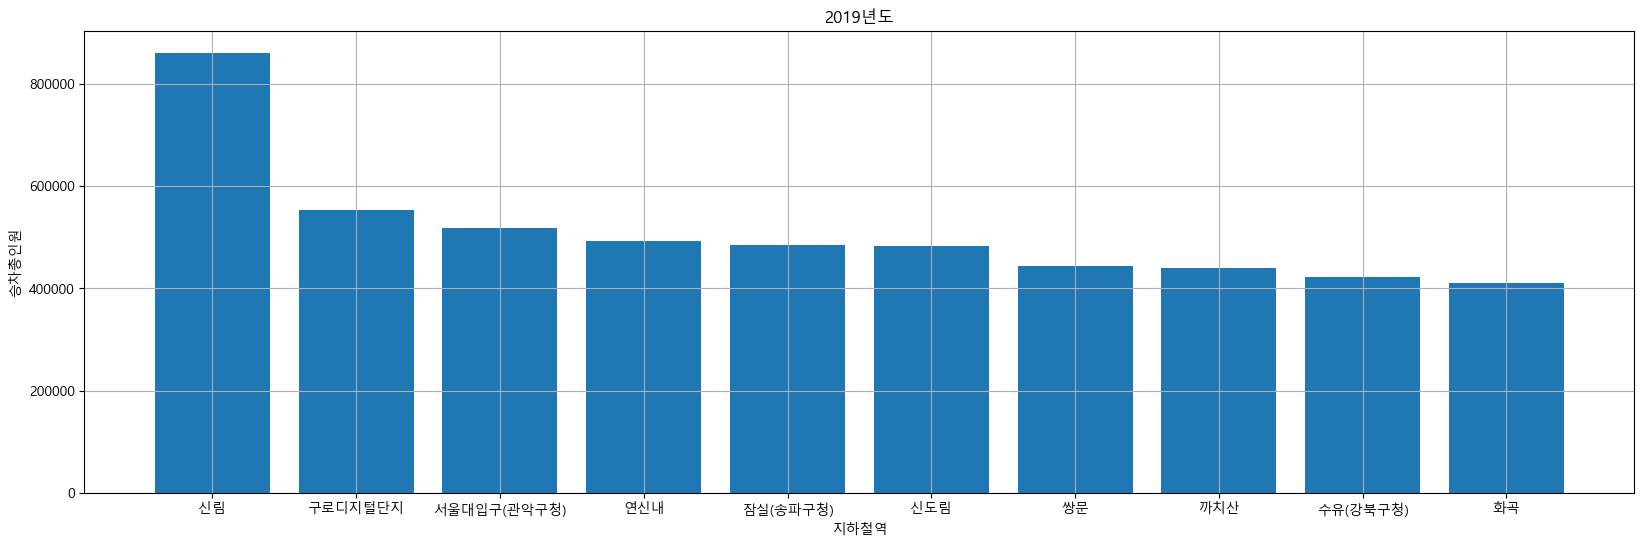

In [34]:
plt.figure(figsize=(20,6))
plt.bar(sp19['지하철역'],sp19['승차총인원'])
plt.title('2019년도')
plt.xlabel('지하철역')
plt.ylabel('승차총인원')
plt.grid()
plt.show()

In [35]:
sp20=sp5.loc[sp['사용월']== 202009 ]

In [36]:
sp20=sp20.sort_values(by='승차총인원',ascending=False).head(10)
sp20

,사용월,지하철역,승차총인원,하차총인원
15875,202009,신림,706664,149388
15852,202009,구로디지털단지,455469,442554
15866,202009,서울대입구(관악구청),429003,143737
15921,202009,연신내,395390,91422
15874,202009,신도림,369404,215373
15970,202009,까치산,362145,55065
15890,202009,잠실(송파구청),354988,335008
15950,202009,쌍문,354028,65433
15947,202009,수유(강북구청),330341,112680
16010,202009,화곡,329471,67297


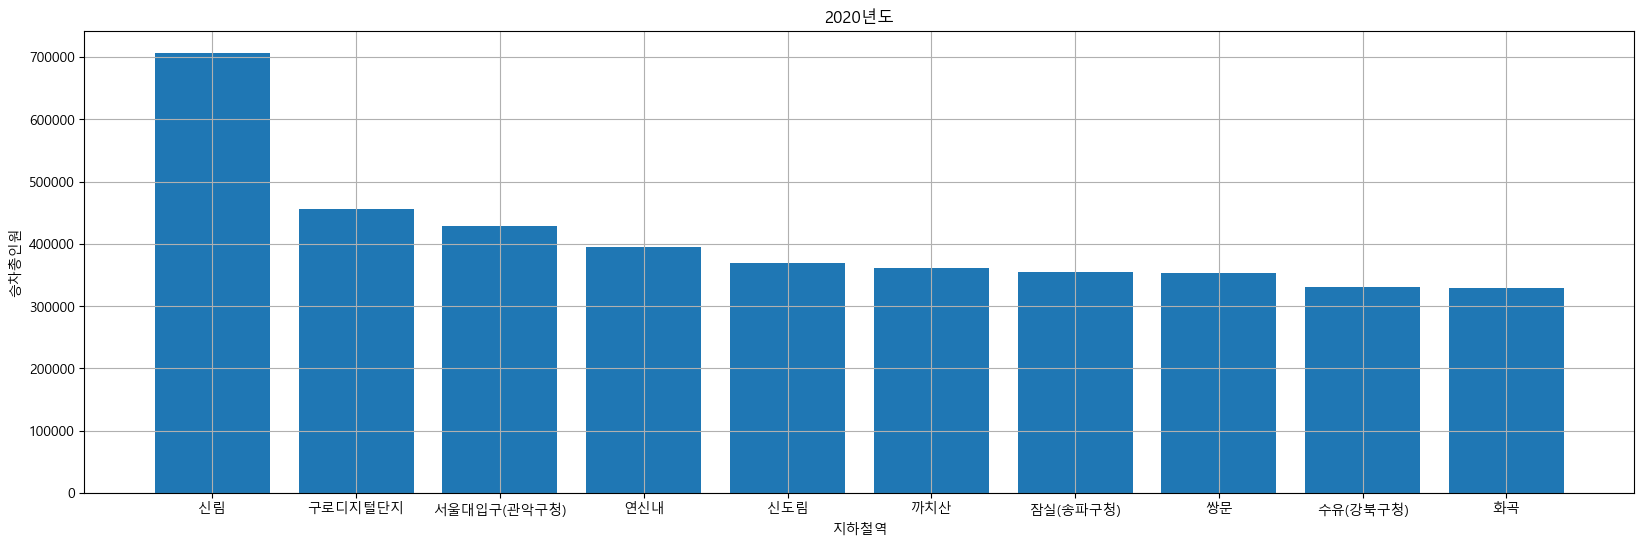

In [37]:
plt.figure(figsize=(20,6))
plt.bar(sp20['지하철역'],sp20['승차총인원'])
plt.title('2020년도')
plt.xlabel('지하철역')
plt.ylabel('승차총인원')
plt.grid()
plt.show()

In [38]:
sp21=sp5.loc[sp4['사용월']==202109]

In [39]:
sp21

,사용월,지하철역,승차총인원,하차총인원
8567,202109,동대문,63389,58292
8568,202109,동묘앞,26156,50140
8569,202109,서울역,135492,352181
8570,202109,시청,23947,270820
8571,202109,신설동,63516,116581
...,...,...,...,...
9169,202109,원덕,3262,1907
9170,202109,중랑,64938,15393
9171,202109,지평,628,503
9172,202109,팔당,4984,9685


In [40]:
sp21=sp21.sort_values(by='승차총인원',ascending=False).head(10)
sp21

,사용월,지하철역,승차총인원,하차총인원
8604,202109,신림,675513,150571
8581,202109,구로디지털단지,427997,419967
8595,202109,서울대입구(관악구청),403454,149890
8650,202109,연신내,379921,96179
8603,202109,신도림,357453,194580
8700,202109,까치산,352859,54347
8619,202109,잠실(송파구청),351636,323137
8679,202109,쌍문,343889,67449
8742,202109,화곡,323283,67281
8676,202109,수유(강북구청),322189,115127


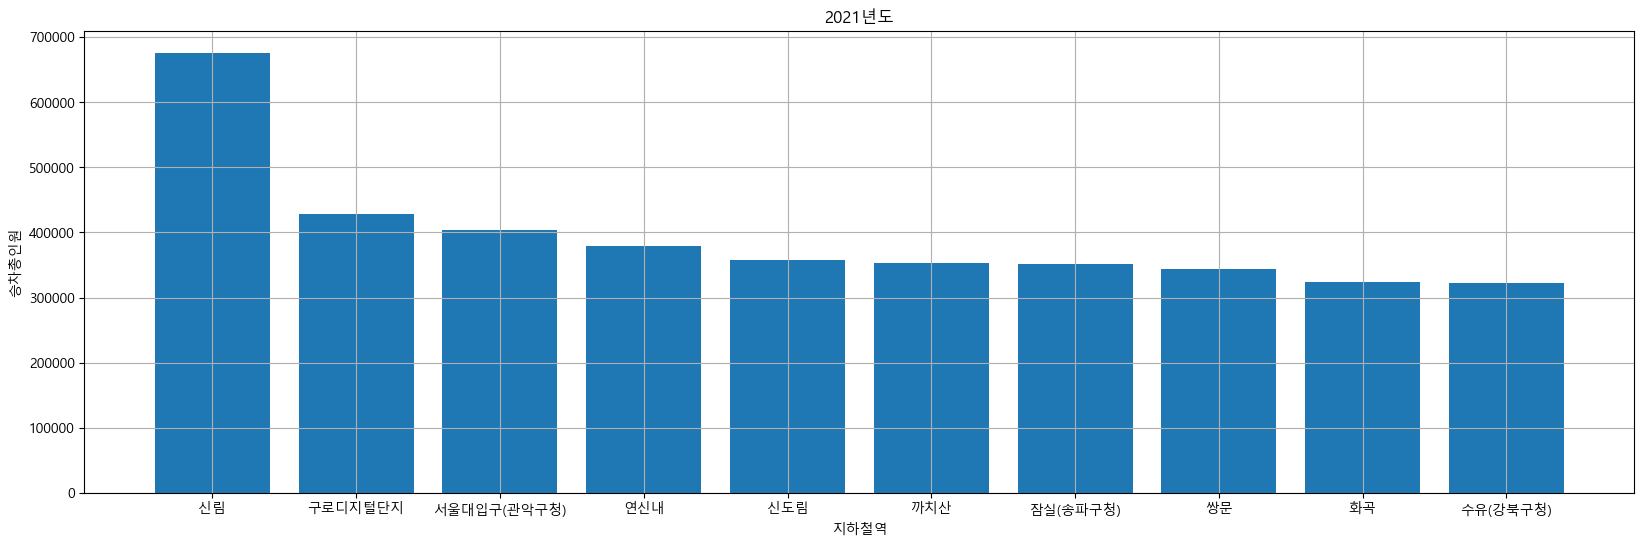

In [41]:
plt.figure(figsize=(20,6))
plt.bar(sp21['지하철역'],sp21['승차총인원'])
plt.title('2021년도')
plt.xlabel('지하철역')
plt.ylabel('승차총인원')
plt.grid()
plt.show()

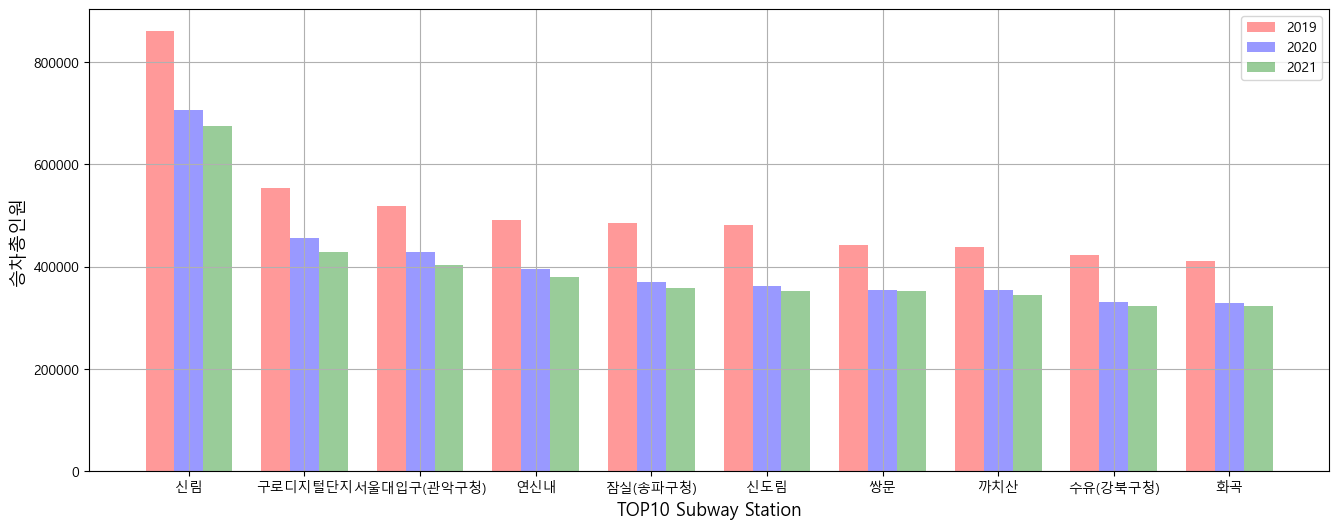

In [42]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(16,6))
bar_width = 0.25
# 상위 10개의 지하철이므로 10개의 배열을 만든다
x = np.arange(10)
# 각 역별로 3개의 승하차인원을 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(x, sp19['승차총인원'], bar_width, alpha=0.4, color='red', label='2019')
b2 = plt.bar(x + bar_width, sp20['승차총인원'], bar_width, alpha=0.4, color='blue', label='2020')
b3 = plt.bar(x + 2 * bar_width, sp21['승차총인원'], bar_width, alpha=0.4, color='green', label='2021')
# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 지하철역 정보와 매칭
subway_array = sp19['지하철역'].to_numpy()
plt.xticks(np.arange(bar_width, 10 + bar_width, 1), subway_array)
# x축, y축 이름 및 범례 설정
plt.xlabel('TOP10 Subway Station', size = 13)
plt.ylabel('승차총인원', size = 13)
plt.legend()
plt.grid()
plt.show()

### 분석결과

가장 많이 승차하는 구간은 : 4구간(신림,구로디지털단지,서울대입구,연신내)로 거의 고정이었으며, 나머지 6개(잠실,신도림,쌍문,까치산,수유,화곡)는 조금의 변동이 있었다.</br>
19년도에 비해 20,21년도는 역별로 10만명씩 승차인원이 줄었다 </br> 
왜 이런 결과가 나왔을까? </br>
인구분포도, 환승역 등

In [43]:
[sp19['지하철역']],[sp20['지하철역']],[sp21['지하철역']]

([23052             신림
  23029        구로디지털단지
  23043    서울대입구(관악구청)
  23098            연신내
  23067       잠실(송파구청)
  23051            신도림
  23127             쌍문
  23147            까치산
  23124       수유(강북구청)
  23185             화곡
  Name: 지하철역, dtype: object],
 [15875             신림
  15852        구로디지털단지
  15866    서울대입구(관악구청)
  15921            연신내
  15874            신도림
  15970            까치산
  15890       잠실(송파구청)
  15950             쌍문
  15947       수유(강북구청)
  16010             화곡
  Name: 지하철역, dtype: object],
 [8604             신림
  8581        구로디지털단지
  8595    서울대입구(관악구청)
  8650            연신내
  8603            신도림
  8700            까치산
  8619       잠실(송파구청)
  8679             쌍문
  8742             화곡
  8676       수유(강북구청)
  Name: 지하철역, dtype: object])

## 하차 19,20,21년도 분리

In [575]:
# sp5.loc[ (sp4['지하철역']=='강남') & (sp4['사용월'] ==201909)]

In [44]:
sp5

,사용월,지하철역,승차총인원,하차총인원
6740,202112,동대문,69783,60187
6741,202112,동묘앞,27422,45142
6742,202112,서울역,153580,437613
6743,202112,시청,27342,326594
6744,202112,신설동,71505,124711
...,...,...,...,...
28389,201901,원덕,4068,1034
28390,201901,중랑,75552,18168
28391,201901,지평,331,191
28392,201901,팔당,4254,6246


In [45]:
sp19out=sp5.loc[sp['사용월']==201909]
sp19out=sp19out.sort_values(by='하차총인원',ascending=False).head(10)
sp19out

,사용월,지하철역,승차총인원,하차총인원
23025,201909,강남,215596,891396
23058,201909,역삼,83506,754918
23041,201909,삼성(무역센터),85022,747896
23224,201909,가산디지털단지,78314,685860
23045,201909,선릉,112420,654807
23065,201909,을지로입구,55440,629756
23021,201909,종각,42348,534997
23017,201909,서울역,206333,526459
23097,201909,양재(서초구청),143743,518955
23142,201909,광화문(세종문화회관),44011,504094


In [559]:
# sp19out.loc[ (sp19out['지하철역']=='강남') & (sp19out['사용월'] ==201909)]

### 그래프화

In [46]:
sp19out=sp5.loc[sp['사용월']==201909]
sp19out=sp19out.sort_values(by='하차총인원',ascending=False).head(10)
sp19out

,사용월,지하철역,승차총인원,하차총인원
23025,201909,강남,215596,891396
23058,201909,역삼,83506,754918
23041,201909,삼성(무역센터),85022,747896
23224,201909,가산디지털단지,78314,685860
23045,201909,선릉,112420,654807
23065,201909,을지로입구,55440,629756
23021,201909,종각,42348,534997
23017,201909,서울역,206333,526459
23097,201909,양재(서초구청),143743,518955
23142,201909,광화문(세종문화회관),44011,504094


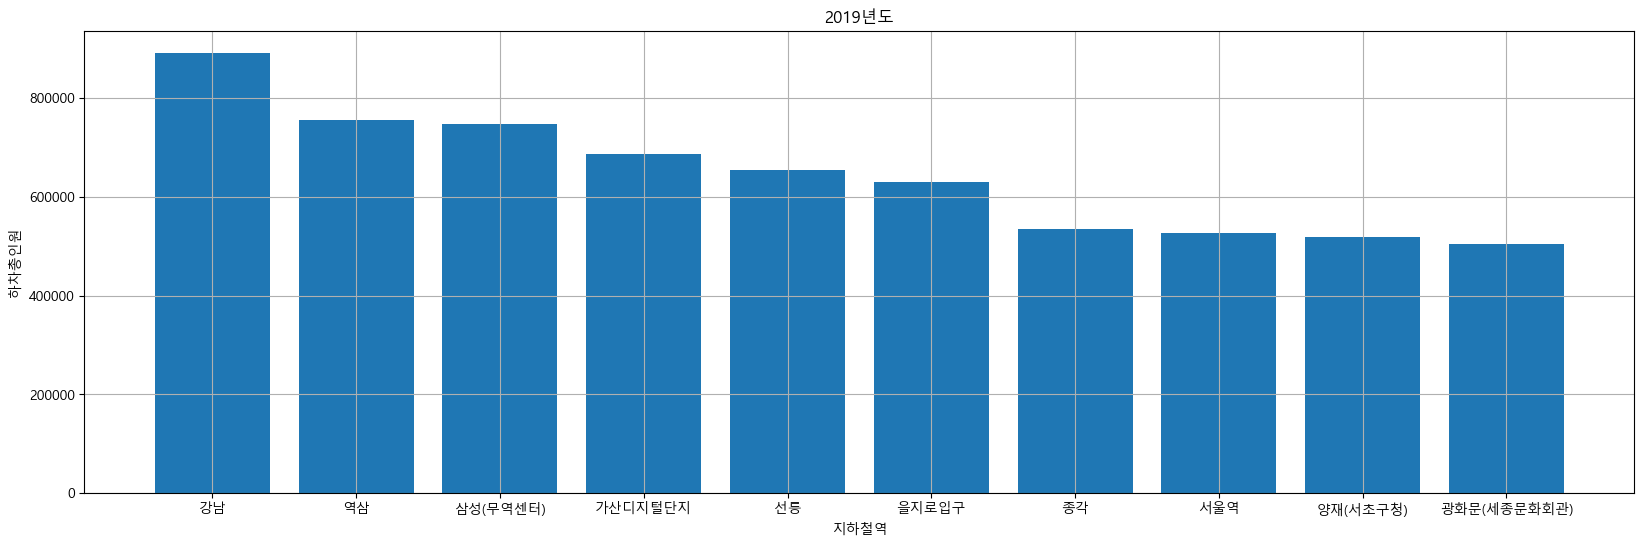

In [47]:
plt.figure(figsize=(20,6))
plt.bar(sp19out['지하철역'],sp19out['하차총인원'])
plt.title('2019년도')
plt.xlabel('지하철역')
plt.ylabel('하차총인원')
plt.grid()
plt.show()

In [48]:
sp20out=sp5.loc[sp['사용월']==202009]
sp20out=sp20out.sort_values(by='하차총인원',ascending=False).head(10)
sp20out

,사용월,지하철역,승차총인원,하차총인원
15848,202009,강남,138313,695291
16050,202009,가산디지털단지,68444,655829
15881,202009,역삼,61905,639747
15864,202009,삼성(무역센터),56776,605541
15868,202009,선릉,76106,558045
15888,202009,을지로입구,31830,475091
15852,202009,구로디지털단지,455469,442554
15920,202009,양재(서초구청),103072,441586
15869,202009,성수,80717,427414
15844,202009,종각,27006,387547


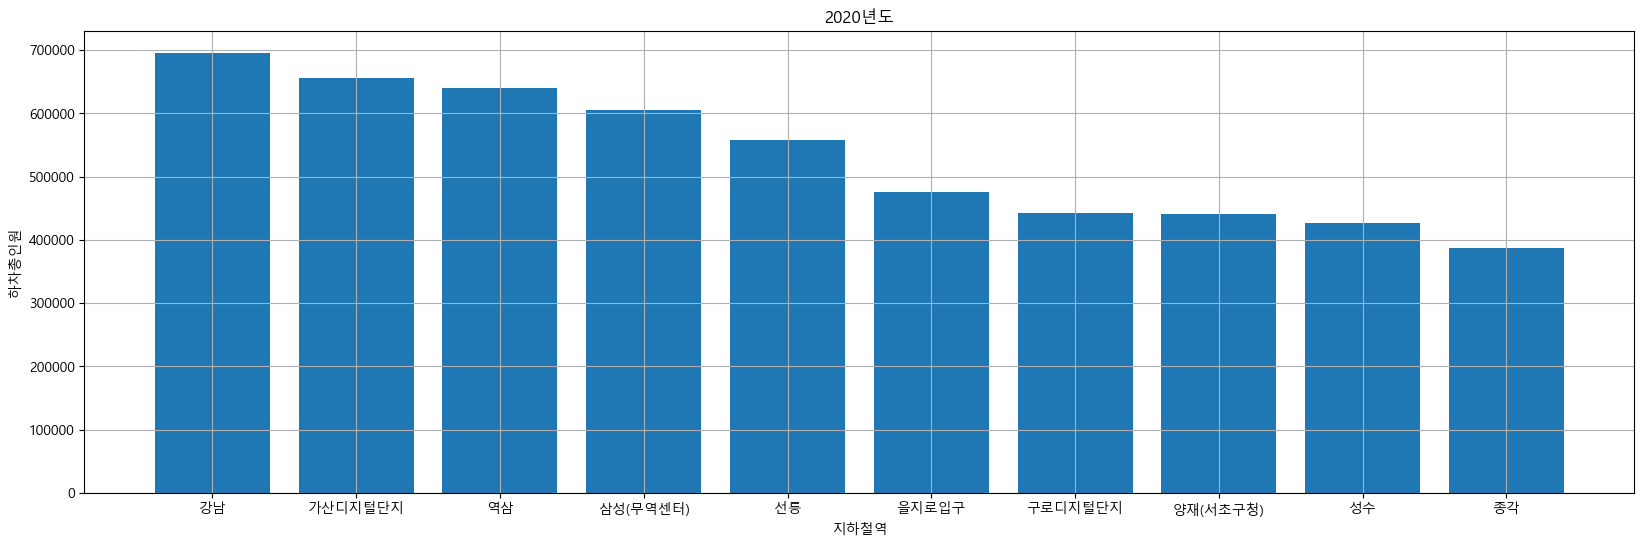

In [49]:
plt.figure(figsize=(20,6))
plt.bar(sp20out['지하철역'],sp20out['하차총인원'])
plt.title('2020년도')
plt.xlabel('지하철역')
plt.ylabel('하차총인원')
plt.grid()
plt.show()

In [50]:
sp21out=sp5.loc[sp['사용월']==202109]
sp21out=sp21out.sort_values(by='하차총인원',ascending=False).head(10)
sp21out

,사용월,지하철역,승차총인원,하차총인원
8577,202109,강남,137404,679530
8782,202109,가산디지털단지,66590,627231
8610,202109,역삼,59820,620519
8593,202109,삼성(무역센터),54752,553314
8597,202109,선릉,76753,524588
8617,202109,을지로입구,33516,455338
8598,202109,성수,76267,433386
8581,202109,구로디지털단지,427997,419967
8649,202109,양재(서초구청),108716,419115
8573,202109,종각,26298,363213


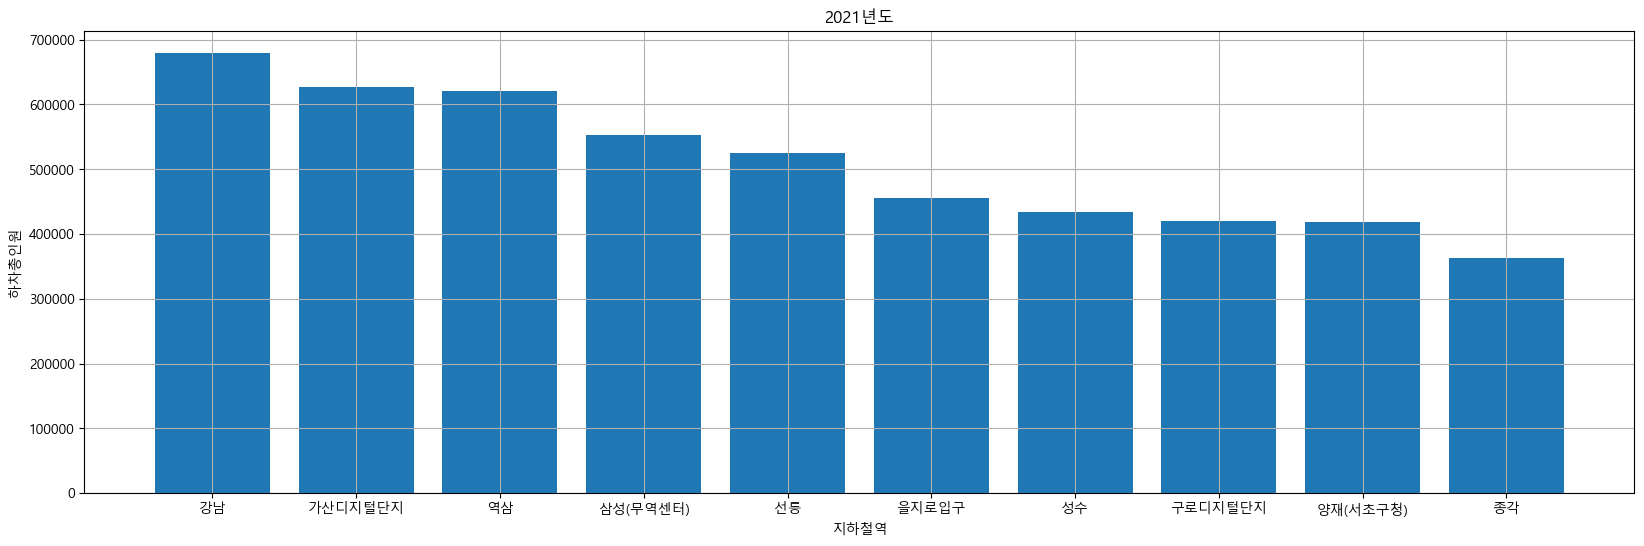

In [51]:
plt.figure(figsize=(20,6))
plt.bar(sp21out['지하철역'],sp21out['하차총인원'])
plt.title('2021년도')
plt.xlabel('지하철역')
plt.ylabel('하차총인원')
plt.grid()
plt.show()

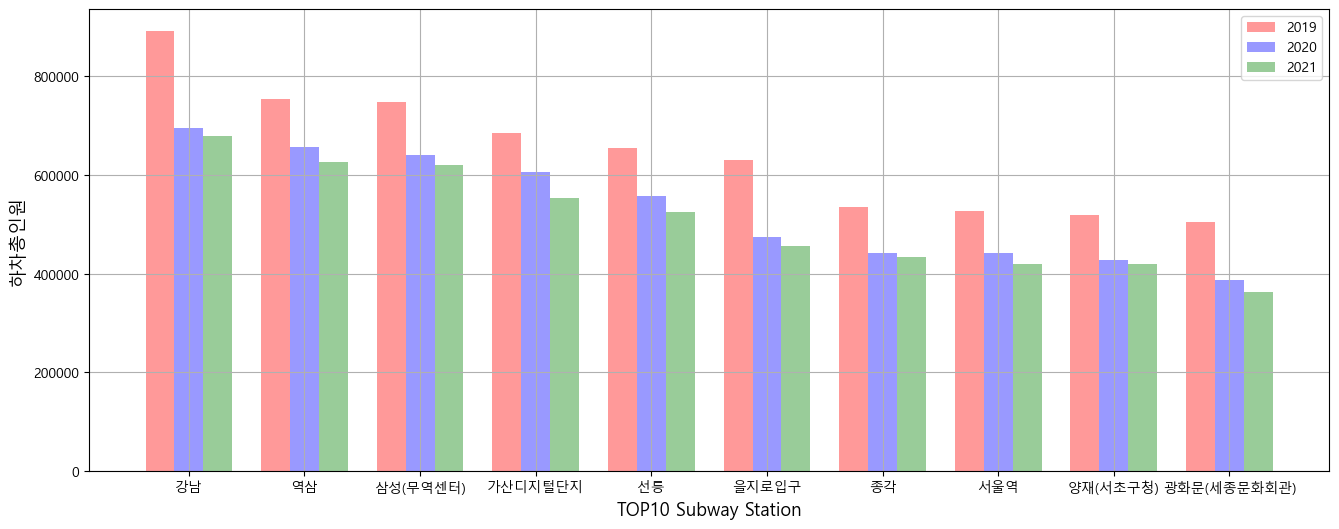

In [57]:
# 하차총인원 top10
# 3:11
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(16,6))
bar_width = 0.25
# 상위 10개의 지하철이므로 10개의 배열을 만든다
x = np.arange(10)
# 각 역별로 3개의 승하차인원을 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(x, sp19out['하차총인원'], bar_width, alpha=0.4, color='red', label='2019')
b2 = plt.bar(x + bar_width, sp20out['하차총인원'], bar_width, alpha=0.4, color='blue', label='2020')
b3 = plt.bar(x + 2 * bar_width, sp21out['하차총인원'], bar_width, alpha=0.4, color='green', label='2021')
# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 지하철역 정보와 매칭
# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 지하철역 정보와 매칭
subway_array = sp19out['지하철역'].to_numpy()
plt.xticks(np.arange(bar_width, 10 + bar_width, 1), subway_array)
# x축, y축 이름 및 범례 설정
plt.xlabel('TOP10 Subway Station', size = 13)
plt.ylabel('하차총인원', size = 13)
plt.legend()
plt.grid()
plt.show()

### 분석결과

(1) 19년도에 비해 20년도, 21년도 강남이 20만명이 줄어든 것에 비해 가산디지털단지는 3만명정도만 줄어든 것으로 파악된다.</br>
게다가 승차총인원, 하차총인원 둘다 많은 높은 것으로 보아서 </br>
이는 코로나로 인해 집에서 자택근무, 온라인수업이 늘어나며 , 컴퓨터부품판매업종이 바빠졌고, 이는 <b>컴퓨터 관련 수요</b> 가 늘어난것으로 파악된다. </br>
(2) 19년도에 비해 20년도, 21년도 서울역은 top10자리에서 밀려나게 되었다. 이는 여행수요의 감소가 원인인 것으로 추측된다. </br>
(3) 19년도에 비해 20년도, 21년도 종각역은 10위로 밀어나게 되었다. 이는 종각 부근의 경제침체화로 이뤄졌다. (부동산 가격비교를 써봐도 괜찮을듯) </br> 

# 서울역 승하차 인원과 서울방문객수의 비교

'C:\\Users\\SBAUser\\Jupyter_Python\\프로젝트 데이터분석'

## 서울방문객수 자료 불러오기

In [62]:
travel=pd.read_csv('./data/서울방문자수_년도별.CSV',encoding='euc-kr')  # https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do 한국관광데이터랩.
travel

,년도별,2019년도,2020년도,2021년도
0,서울시방문자수,"676,239,448","486,063,680","487,463,395"


## 승하차 총합

In [65]:
sp.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202211,1호선,동대문,728,4,10942,1871,8782,6391,14368,...,7946,518,2191,5,206,0,1,0,0,20221203
1,202211,1호선,동묘앞,205,4,3082,1052,3731,4674,6555,...,3580,89,1322,2,332,0,1,0,0,20221203
2,202211,1호선,서울역,698,24,8634,8662,13165,49665,42055,...,13413,2321,2639,2,192,0,0,0,0,20221203
3,202211,1호선,시청,121,0,2050,4369,3391,23225,7286,...,3194,872,850,1,26,0,0,0,0,20221203
4,202211,1호선,신설동,372,15,9256,2278,9260,8707,20784,...,7874,370,2070,1,6,0,0,0,0,20221203


In [70]:
spseoul=sp.loc[sp['지하철역']=='서울역']
spseoul

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
2,202211,1호선,서울역,698,24,8634,8662,13165,49665,42055,...,13413,2321,2639,2,192,0,0,0,0,20221203
107,202211,4호선,서울역,266,5,4438,959,6235,16379,12772,...,8184,656,2659,2,276,0,0,0,0,20221203
342,202211,경부선,서울역,4,1,57,496,127,3512,10555,...,637,787,35,0,1,0,0,0,0,20221203
408,202211,경의선,서울역,1,0,803,6,1144,8333,3135,...,1025,1,96,0,0,0,0,0,0,20221203
469,202211,공항철도 1호선,서울역,258,1,3434,1370,3356,12873,11833,...,3222,138,1722,0,0,0,0,0,0,20221203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55282,201501,4호선,서울역,94,6,3646,921,5324,13874,10483,...,12626,934,3777,1,479,0,0,0,0,20151223
55493,201501,경부선,서울역,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,20151223
55561,201501,경의선,서울역,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,20151223
55562,201501,경의선,서울역,1,1,693,6,1296,5969,2391,...,1445,0,136,0,0,0,0,0,0,20151223


In [ ]:
spseoul

In [71]:
spseoul=spseoul[spseoul["사용월"] >= 201901] 
spseoul=spseoul[spseoul["사용월"] <= 202112]
spseoul

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
6742,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,...,8703,61,841,0,2,0,0,0,0,20220103
6847,202112,4호선,서울역,175,7,3801,504,5347,10304,10802,...,5022,8,1311,0,0,0,0,0,0,20220103
7089,202112,경부선,서울역,1,0,42,292,82,2399,8411,...,301,16,17,0,0,0,0,0,0,20220103
7155,202112,경의선,서울역,2,0,787,5,1028,6428,2666,...,954,0,80,0,0,0,0,0,0,20220103
7216,202112,공항철도 1호선,서울역,90,0,2322,522,1933,7933,9367,...,2021,9,1184,0,0,0,0,0,0,20220103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27903,201901,4호선,서울역,211,6,4752,908,6708,13926,12348,...,13031,862,4689,2,476,0,0,0,0,20190203
28138,201901,경부선,서울역,1,0,61,176,40,1173,6380,...,246,574,15,1,1,0,0,0,0,20190203
28205,201901,경의선,서울역,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,20190203
28206,201901,경의선,서울역,0,0,594,7,866,5852,1687,...,1292,1,114,0,0,0,0,0,0,20190203


In [ ]:
# Data1 = Data1.drop("Weight", axis = 1)

In [72]:
spseoul=spseoul.drop('작업일자', axis=1)

In [73]:
spseoul

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
6742,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,...,12519,8703,61,841,0,2,0,0,0,0
6847,202112,4호선,서울역,175,7,3801,504,5347,10304,10802,...,2258,5022,8,1311,0,0,0,0,0,0
7089,202112,경부선,서울역,1,0,42,292,82,2399,8411,...,2824,301,16,17,0,0,0,0,0,0
7155,202112,경의선,서울역,2,0,787,5,1028,6428,2666,...,1067,954,0,80,0,0,0,0,0,0
7216,202112,공항철도 1호선,서울역,90,0,2322,522,1933,7933,9367,...,4260,2021,9,1184,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27903,201901,4호선,서울역,211,6,4752,908,6708,13926,12348,...,7226,13031,862,4689,2,476,0,0,0,0
28138,201901,경부선,서울역,1,0,61,176,40,1173,6380,...,4083,246,574,15,1,1,0,0,0,0
28205,201901,경의선,서울역,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
28206,201901,경의선,서울역,0,0,594,7,866,5852,1687,...,2529,1292,1,114,0,0,0,0,0,0


In [117]:
spseoul2

,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,총합
사용월,,,,,,,,,,,,,,,,,,,,,
201901,1433,28,21470,11135,27481,77332,72986,179309,137378,418160,...,39459,5171,14892,4,887,0,0,0,0,5634271
201902,1375,24,17680,9325,22810,67572,63029,147962,120358,340470,...,35243,6499,13690,520,848,0,28,0,0,5092601
201903,1596,40,22845,11585,28876,88513,78433,182381,145993,410391,...,44237,5224,17168,2,885,0,0,0,0,5870254
201904,1462,31,22676,12617,30276,102705,85284,200714,154437,447358,...,42953,5781,15775,4,989,0,0,0,0,5941124
201905,1623,35,24163,13524,31344,106547,84877,199620,155208,435329,...,46766,6206,16511,4,1220,0,0,0,0,6096899
201906,1543,35,23479,12716,29358,96255,78031,179782,140031,392103,...,43150,5111,16073,6,874,0,0,0,0,5670193
201907,1515,42,23717,12376,29716,92669,81177,195501,151147,453792,...,41611,5253,15654,2,909,0,0,0,0,5830098
201908,1411,39,23817,12503,29437,93453,79848,187392,139085,406549,...,43029,5466,16665,4,828,0,0,0,0,5842803
201909,1326,22,22235,11752,27508,90086,79651,179079,140594,389309,...,38295,6376,14461,397,1028,0,17,0,0,5510743


In [79]:
spseoul2=spseoul.groupby('사용월').sum()
spseoul2

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15836\405365086.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spseoul2=spseoul.groupby('사용월').sum()


,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
사용월,,,,,,,,,,,,,,,,,,,,,
201901,1433,28,21470,11135,27481,77332,72986,179309,137378,418160,...,54405,39459,5171,14892,4,887,0,0,0,0
201902,1375,24,17680,9325,22810,67572,63029,147962,120358,340470,...,52029,35243,6499,13690,520,848,0,28,0,0
201903,1596,40,22845,11585,28876,88513,78433,182381,145993,410391,...,60681,44237,5224,17168,2,885,0,0,0,0
201904,1462,31,22676,12617,30276,102705,85284,200714,154437,447358,...,60375,42953,5781,15775,4,989,0,0,0,0
201905,1623,35,24163,13524,31344,106547,84877,199620,155208,435329,...,64057,46766,6206,16511,4,1220,0,0,0,0
201906,1543,35,23479,12716,29358,96255,78031,179782,140031,392103,...,58960,43150,5111,16073,6,874,0,0,0,0
201907,1515,42,23717,12376,29716,92669,81177,195501,151147,453792,...,57466,41611,5253,15654,2,909,0,0,0,0
201908,1411,39,23817,12503,29437,93453,79848,187392,139085,406549,...,59577,43029,5466,16665,4,828,0,0,0,0
201909,1326,22,22235,11752,27508,90086,79651,179079,140594,389309,...,53782,38295,6376,14461,397,1028,0,17,0,0


In [83]:
spseoul2['총합']=spseoul2.sum(axis=1)

In [84]:
spseoul2

,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,총합
사용월,,,,,,,,,,,,,,,,,,,,,
201901,1433,28,21470,11135,27481,77332,72986,179309,137378,418160,...,39459,5171,14892,4,887,0,0,0,0,5634271
201902,1375,24,17680,9325,22810,67572,63029,147962,120358,340470,...,35243,6499,13690,520,848,0,28,0,0,5092601
201903,1596,40,22845,11585,28876,88513,78433,182381,145993,410391,...,44237,5224,17168,2,885,0,0,0,0,5870254
201904,1462,31,22676,12617,30276,102705,85284,200714,154437,447358,...,42953,5781,15775,4,989,0,0,0,0,5941124
201905,1623,35,24163,13524,31344,106547,84877,199620,155208,435329,...,46766,6206,16511,4,1220,0,0,0,0,6096899
201906,1543,35,23479,12716,29358,96255,78031,179782,140031,392103,...,43150,5111,16073,6,874,0,0,0,0,5670193
201907,1515,42,23717,12376,29716,92669,81177,195501,151147,453792,...,41611,5253,15654,2,909,0,0,0,0,5830098
201908,1411,39,23817,12503,29437,93453,79848,187392,139085,406549,...,43029,5466,16665,4,828,0,0,0,0,5842803
201909,1326,22,22235,11752,27508,90086,79651,179079,140594,389309,...,38295,6376,14461,397,1028,0,17,0,0,5510743


### 2019년 총합

In [91]:
spseoul2019 =spseoul2.head(12)

In [90]:
spseoul2019['총합'].sum(axis=0)  #2019년 총합

69888828

### 2020년 총합

In [108]:
spseoul['사용월']

6742     202112
6847     202112
7089     202112
7155     202112
7216     202112
          ...  
27903    201901
28138    201901
28205    201901
28206    201901
28267    201901
Name: 사용월, Length: 197, dtype: int64

In [120]:
spseoul2020a=spseoul[spseoul['사용월']>=202001]

In [121]:
spseoul2020=spseoul2020a[spseoul2020a['사용월']<=202012]
spseoul2020

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,총합
14029,202012,1호선,서울역,581,11,8010,5042,9302,25859,27028,...,3737,15,326,4,4,0,1,0,0,1841904
14134,202012,4호선,서울역,118,3,3486,422,4467,6913,9738,...,1895,2,603,0,0,0,0,0,0,716030
14372,202012,경부선,서울역,1,0,35,150,35,1337,5561,...,101,12,9,0,0,0,0,0,0,330241
14437,202012,경의선,서울역,1,0,724,9,735,4817,2038,...,527,0,32,0,0,0,0,0,0,375931
14498,202012,공항철도 1호선,서울역,71,1,1677,441,1513,5369,6700,...,844,1,516,0,0,0,0,0,0,475211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20733,202001,4호선,서울역,275,5,5028,911,6520,15220,11764,...,12370,901,4448,35,522,0,5,0,0,1268113
20969,202001,경부선,서울역,2,3,51,311,80,2071,8314,...,388,1115,36,7,1,0,0,0,0,473940
21035,202001,경의선,서울역,0,0,660,11,734,5878,1804,...,1236,11,157,1,0,0,0,0,0,457277
21036,202001,경의선,서울역,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,202009


In [122]:
spseoul['총합']=spseoul.sum(axis=1)

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15836\1409735783.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  spseoul['총합']=spseoul.sum(axis=1)


In [123]:
spseoul2020['총합'].sum(axis=0) 

55488931

### 2021년 총합

In [93]:
spseoul2021 =spseoul2.tail(12)

In [95]:
spseoul2021['총합'].sum(axis=0) 

41783872

### 19~21년 데이터 총합 만들기

In [126]:
! pip install pandas
import pandas as pd
from pandas import Series, DataFrame

In [155]:
sptotal2=DataFrame({'2019':[spseoul2019['총합'].sum(axis=0)],'2020':[spseoul2020['총합'].sum(axis=0)],'2021':[spseoul2021['총합'].sum(axis=0)]},index=['총인원'])
sptotal2

,2019,2020,2021
총인원,69888828,55488931,41783872


# 코로나확진자수와 지하철인원의 상관계수

# 우리는 지하철 언제? 어디에? 있어야 앉을수 있을까? OR 호선별 TOP5 뽑아내기

In [157]:
sp = pd.read_csv('./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보1205 (2).csv', encoding='euc-kr')

In [161]:
sp.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202211,1호선,동대문,728,4,10942,1871,8782,6391,14368,...,7946,518,2191,5,206,0,1,0,0,20221203
1,202211,1호선,동묘앞,205,4,3082,1052,3731,4674,6555,...,3580,89,1322,2,332,0,1,0,0,20221203
2,202211,1호선,서울역,698,24,8634,8662,13165,49665,42055,...,13413,2321,2639,2,192,0,0,0,0,20221203
3,202211,1호선,시청,121,0,2050,4369,3391,23225,7286,...,3194,872,850,1,26,0,0,0,0,20221203
4,202211,1호선,신설동,372,15,9256,2278,9260,8707,20784,...,7874,370,2070,1,6,0,0,0,0,20221203


## 승차인원

In [185]:
in_subway= sp.columns.tolist()[:3]
for a in sp.columns.tolist():
    if a.find('하차')!= -1 :
        in_subway.append(a)

in_subway_df = sp[in_subway]

in_subway_df

,사용월,호선명,지하철역,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
0,202211,1호선,동대문,4,1871,6391,11493,21825,22349,22100,...,20137,19091,12598,10865,9671,7946,2191,206,1,0
1,202211,1호선,동묘앞,4,1052,4674,8851,21633,18442,20527,...,9948,7514,5419,5452,5716,3580,1322,332,1,0
2,202211,1호선,서울역,24,8662,49665,109445,219435,160791,81565,...,97723,64928,45433,40098,28157,13413,2639,192,0,0
3,202211,1호선,시청,0,4369,23225,68121,195016,101983,45320,...,27858,12939,8135,7653,5318,3194,850,26,0,0
4,202211,1호선,신설동,15,2278,8707,24027,57914,33623,21667,...,30189,20965,13846,13169,11142,7874,2070,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55721,201501,중앙선,운길산,0,56,403,675,1390,3270,3673,...,1218,1457,769,760,775,633,222,0,0,0
55722,201501,중앙선,원덕,0,4,46,248,344,273,497,...,721,714,612,404,339,383,157,0,0,0
55723,201501,중앙선,중랑,1,424,2084,3027,6573,6133,5605,...,19547,21424,14362,11678,11060,6501,1617,0,0,0
55724,201501,중앙선,팔당,0,50,149,523,1151,2931,3932,...,822,749,320,319,339,336,85,0,0,0


## 그룹화

In [186]:
station_group=in_subway_df.groupby(['호선명','지하철역']).sum()
station_group=station_group.drop(['사용월'],axis=1)

In [197]:
station_group.style.background_gradient()

In [188]:
#1호선
station_group.loc['1호선'].style.background_gradient()

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
동대문,1125,204048,731379,1320594,2753111,2698332,2694495,3088056,3134373,3063901,2964524,2805313,2594451,2579596,2631286,2713663,1998722,1596877,1456773,1202222,351889,6159,228,0
동묘앞,273,82696,386246,962969,2482945,1716851,1808703,2417326,2753591,3085449,3036138,2602221,1980173,1512971,1115008,790334,551581,546027,575896,386328,255556,18573,720,0
서울역,2843,768525,4477202,9710287,19992145,12858157,7240566,6496139,7063920,7251330,6983003,7301878,7581693,8272328,9088041,6761771,4739358,4180457,3324417,1749271,558157,39315,690,0
시청,253,408098,2030888,6463862,16552199,7475345,3893710,3714677,3474079,3732138,3293065,2795658,2471868,2480649,2549445,1462445,798060,678672,520942,315077,89298,2235,105,0
신설동,1231,232863,843764,2539419,6588398,3692508,2279398,2055402,2014631,2116358,1975344,2029094,2039686,2426741,2710601,2162794,1427582,1371910,1321987,913454,204124,1939,152,0
제기동,470,223381,875873,1829539,4315733,3586401,3858659,4635478,4926024,5169078,4828380,4188717,3338259,2733340,2621900,2026530,1234207,1119520,1049567,695104,143488,1028,11,0
종각,328,439257,2509994,9619806,23656720,13537083,6526362,6002361,5603031,5850153,5027779,4419635,4453556,5161384,6610136,4316952,1738446,1088120,745746,484059,111255,1392,68,0
종로3가,1167,255954,1239426,2686160,7642625,8308008,6975538,7187673,7256947,7347512,6573587,5452532,4733433,4493288,4945774,3131399,1302896,930929,713007,490027,200969,4005,144,0
종로5가,142,327992,1442149,4019649,10785821,6939964,5364687,5584065,5431158,5105946,4844047,4261325,3710135,3362889,3168652,2000739,931524,672774,489534,312937,88793,864,42,0


서울역은 항상 사람이 가장많다. 
오후시간대는 종각이 제일 승차인원이 많다.

In [189]:
#2호선
station_group.loc['2호선'].style.background_gradient()

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,648,1168360,5448940,15940295,31885086,31836497,15793301,12814779,12756255,15366865,13421182,12625057,13038704,15825005,22047876,16482082,7789318,5974766,5041016,3130912,801856,17182,1146,141
강변,47,100760,848292,998516,1478059,1385237,1286228,1319337,1444569,1669037,1816167,2031146,2235070,2470776,3253615,2965518,2063561,1859876,1778929,1010556,247779,2649,68,0
강변(동서울터미널),79,240789,2050060,2406676,3963360,3590665,3379280,3338506,3779442,4303968,4662328,5357737,5930225,6909749,9609952,7651342,5170429,4572418,4239217,2241415,476572,8578,413,40
건대입구,1065,190749,1678656,2634804,6586396,5034381,4490548,4816034,5843513,6538618,6531297,6985144,8110479,10756969,16133554,13161540,7646809,6820483,6223293,3812848,1201077,93500,1358,115
교대,13,135718,673532,1602715,3560809,3236002,1667820,1480407,1345627,1495628,1422097,1311210,1298670,1460091,1884109,1438057,815506,721746,697837,406161,113575,884,101,0
교대(법원.검찰청),59,524538,1999181,4427252,11477828,10565531,5258997,4469573,4114829,4538291,4201840,3857476,3887362,4649678,5928379,3908278,2159804,1926427,1812208,1016334,236870,3116,309,49
구로디지털단지,723,582452,2126532,7344562,24906990,14497721,5922865,4905262,4959900,6027317,6348405,6861555,7728236,10502822,15497631,14092517,9099320,9185301,9383538,5687075,1319536,25523,768,75
구의,54,32670,262247,366812,1050311,697565,536159,492784,534575,628464,668659,782069,863684,1055372,1578855,1550683,1060609,1022997,1052160,625778,214623,2858,82,0
구의(광진구청),121,97803,820992,1133502,2958329,1881622,1504649,1481547,1668149,1893556,2028651,2490177,2875361,3839148,6283770,5124627,3340277,3278580,3129070,1758273,475007,9796,363,33


In [190]:
#3호선
station_group.loc['3호선'].style.background_gradient()

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
가락시장,131,54855,514029,994791,2701014,1414885,1011892,1055560,1103211,1180719,1255779,1412362,1509221,1781810,2331407,1965143,1288936,1151361,1110379,677572,204758,4325,113,0
경복궁,49,36601,323028,1121900,2857247,1668780,1211199,1106707,1057261,1079769,970964,865711,772128,784800,881283,671080,358709,300485,294904,183589,53642,1291,24,0
경복궁(정부서울청사),150,116651,1002421,3139368,8766939,5296036,3691149,3356844,3136363,3256657,2854361,2474062,2345061,2435293,2786648,1936222,1006546,873150,809078,478131,114345,3264,80,0
경찰병원,59,20373,273539,766553,2937185,1401250,856138,669054,752094,927503,909979,902956,972441,1298050,1881143,1739205,1102635,962103,946851,606977,161890,719,43,0
고속터미널,153,410245,3412363,5052977,7657529,9857003,8815622,10146158,9959602,10178225,10713748,11174333,11219034,11825210,13284188,9380832,5543891,4136714,3070572,1628635,280857,1748,147,0
교대,9,15783,170076,571079,1179855,828865,432294,325612,301651,321207,313685,287155,280206,343934,453647,337616,172576,129547,115050,76186,26363,172,3,0
교대(법원.검찰청),40,48924,490643,1536218,3673698,2634047,1281912,907490,863203,913109,852114,791253,800193,1047226,1406218,862488,422271,338993,304908,194626,50802,407,25,0
구파발,425,149307,1139181,1878223,2539252,2374920,2179822,1929376,2054210,2192714,2242658,2378497,2875650,3455379,5584769,5395084,3237489,2997413,2760872,2039723,595518,29546,518,0
금호,505,65391,346189,459243,803692,679267,633594,674624,780508,910359,991457,1219910,1442920,1845359,2690404,2185032,1521727,1388808,1333912,771272,181050,751,6,0


In [191]:
#4호선
station_group.loc['4호선'].style.background_gradient()

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
길음,132,205177,849800,1590362,3633378,2931625,2373981,2466416,2478450,2838379,2870243,3129177,3735285,4857375,7241463,6795746,4301963,3995895,4055689,2590083,521865,2577,8,0
남태령,18,8014,120520,366254,458408,171815,119832,109317,120281,122202,126563,131138,140403,164653,197649,194411,116531,107996,92863,56654,21758,640,11,1
노원,508,53764,859039,1523194,3029659,3360507,2466490,2386615,2762933,3128054,3266109,3578139,4124016,5358124,7940149,7397890,4547275,3984942,3566565,2612568,832253,37637,95,0
당고개,73,2216,673235,904236,1357604,1301503,1285491,1150101,1262297,1352249,1428378,1736584,2070194,2469700,3433376,3441009,2499589,2274201,2184394,1579413,460998,40341,315,0
동대문,886,264095,1445656,3844364,8278894,7271841,6027020,5330180,4567840,4631166,4396464,3757494,3007989,2377172,1973881,2421921,1784127,1197149,799032,770362,175855,2641,88,0
동대문역사문화공원,286,107693,905038,2023516,5313759,2977555,2388407,2165125,2125399,2358249,2263602,2050393,1937632,2048269,2308193,2917512,1764012,1321470,1066645,758852,228336,2763,61,0
동대문역사문화공원(DDP),80,44460,375500,804550,2074648,1128477,753118,699774,651477,663262,639162,548971,487633,512091,552524,714129,360891,254871,186781,149922,22167,275,2,0
동작,14,5603,49542,101132,174140,114692,86267,70412,86243,111581,100412,101536,109293,118097,146337,138342,92094,78820,70118,47790,20132,2136,7,0
동작(현충원),23,17995,170585,270274,497500,354562,271540,231468,254890,312905,301072,310423,322108,369732,478965,374210,256102,206411,183146,122063,48983,4510,38,0


In [192]:
#5호선
station_group.loc['5호선'].style.background_gradient()

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강동,46,118877,1309399,2311409,3838680,2318779,1708874,1594705,1747268,1963471,1980054,2225758,2577181,3212315,4777563,4424218,2848677,2687882,2627333,1746026,637611,2476,228,0
강일,1,9664,47230,72899,114796,47861,47264,54799,71345,72592,81425,101655,128249,180147,267692,260695,154119,134920,126173,79548,9211,7,0,0
개롱,10,82993,311739,819789,1596629,884149,606109,578091,674667,760322,802216,921002,1173977,1381283,1843482,1976993,1126516,1018935,1115885,644689,234862,757,1,2
개화산,15,30850,392299,625328,1535565,641479,487066,484085,588474,584483,617612,702828,816626,964065,1435784,1483772,957483,908702,864275,520389,180336,8918,127,0
거여,1,45874,434190,675718,1569064,831195,584884,580245,694085,791324,809982,1010099,1325442,1527132,2124302,2188776,1252881,1169730,1197188,689184,241692,917,39,0
고덕,8,141551,611671,1393980,1657008,1198434,1039398,952353,1011784,1239617,1184821,1215980,1346483,1622777,2458208,2522976,1394491,1247766,1245018,753577,229356,19670,231,0
공덕,56,85653,724271,2757250,7898262,3531457,1539688,1463091,1366830,1476265,1363363,1413436,1601258,2216926,3926695,2454067,1325934,1195336,1088273,674015,164651,1162,81,0
광나루,1,41264,185103,378275,850935,510374,418856,373707,367838,391377,376419,408333,462050,541339,769979,742969,486470,445663,450247,288628,71315,345,0,0
광나루(장신대),4,128421,598326,1148433,2467118,1544901,1294004,1087887,1152482,1227857,1188839,1275791,1548136,1894692,2806759,2218266,1422984,1335959,1276547,752553,151476,819,7,0


In [193]:
#6호선
station_group.loc['6호선'].style.background_gradient()

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
고려대,2,16394,92952,253654,733088,386263,389841,263855,271834,310102,269012,276589,296314,362131,499471,496872,321886,327596,322929,260691,68909,1379,31,0
고려대(종암),45,62137,353982,788851,2160467,1064864,975138,735402,753143,893202,756341,806244,890028,1114037,1669906,1492437,915336,930677,904123,690845,149879,3516,60,0
공덕,96,190023,924318,3268759,9405505,4344022,2172035,1829929,1824563,1935506,1868721,1902357,2119155,2610716,3768583,2837429,1658515,1535613,1490548,1002378,430311,25517,823,0
광흥창,3,25960,160903,410289,805935,433264,299464,238526,241625,261004,251547,260078,287333,323120,434373,410983,272760,235301,226363,163000,45076,180,1,0
광흥창(서강),22,96382,390241,1258983,2778558,1432137,869649,717724,748689,808382,777216,837356,927179,1109654,1596111,1303948,807925,750515,706562,448165,100671,529,4,0
구산,14,14308,228970,733003,731501,552509,512387,595582,649073,712264,789737,877505,1165363,1271163,1816591,1880383,1076859,893469,854172,586958,182396,581,69,0
녹사평(용산구청),19,45453,384107,961077,1661990,871015,748407,847934,981912,1140430,1068033,1106452,1229328,1493851,1855244,1506794,792095,617891,511210,363749,102847,523,4,0
대흥,4,20070,98152,315613,851576,435162,349623,263676,283331,297538,279032,244437,289859,311929,440194,369252,231877,204516,212737,163513,45521,257,0,0
대흥(서강대앞),43,78528,333275,998078,2580818,1381731,1049172,806733,911400,965505,867964,830353,971698,1111041,1624666,1187095,717405,654403,648609,457275,104694,598,15,0


In [194]:
#7호선
station_group.loc['7호선'].style.background_gradient()

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
가산디지털단지,308,461240,2159664,10583190,37236656,18748156,5280303,3700866,3512634,3647544,3413931,3158410,3051210,3151177,3439546,2725251,1485785,1194689,1059907,704022,221459,882,148,0
강남구청,21,153857,1193486,2928324,10083802,8665384,3463426,2228682,1955818,2095299,1810439,1658748,1681220,1749949,1940944,1425308,890748,739114,581243,411414,161607,630,83,0
건대입구,78,78958,735226,1846417,3992160,3161208,2422592,2263736,2537688,2735929,2573523,2476875,2602079,3162374,4611911,3679445,1902864,1567016,1320284,778735,411839,34035,113,0
고속터미널,172,242309,2209259,3650099,5597395,4173816,2993710,2831574,2688180,2943638,2786990,2437755,2401122,2534571,2909311,2095659,1188842,1022571,635695,385692,90848,701,84,0
공릉,2,30103,123428,313462,679448,423411,340702,273127,318596,372359,338089,390400,457105,555764,774092,862438,582300,492923,471445,355405,131030,428,25,0
공릉(서울과학기술대),13,89567,359457,848208,1957070,1237380,962766,870010,1055906,1200687,1123490,1298451,1536340,1907429,2825347,2844822,1672954,1488066,1405644,1006274,289350,1080,39,0
광명사거리,241,478019,1181094,1740632,2740389,2377434,2215364,2445901,2707207,2957559,3120036,3666738,4343788,5563836,8753862,7977806,4709276,4328996,3876344,2483739,655699,3216,389,0
군자,14,21283,155122,197612,593278,391803,250421,224057,239091,277245,303760,347889,389487,489866,712889,737739,479481,433290,423823,281483,95771,1345,34,0
군자(능동),96,65777,489607,625957,1890229,1237034,796346,740606,788092,887093,953699,1159303,1319917,1736816,2704127,2397022,1430813,1316549,1217789,742614,193724,3013,64,0


In [195]:
#8호선
station_group.loc['8호선'].style.background_gradient()

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
가락시장,28,217867,581265,1234678,3644823,1651780,1082445,1011042,987404,1057570,1037646,1069830,1176428,1379245,1905743,1497214,1006306,868794,718548,447191,210339,36497,569,0
강동구청,28,94835,504918,1317082,3401597,1389254,1016562,934250,1028042,1197860,1267506,1363668,1707322,2080498,3183379,2756633,1676203,1539236,1515328,789656,242670,1017,1,0
남위례,9,6097,25778,60703,185599,90559,52673,51351,59710,69759,66276,77624,100948,133019,202035,154682,81562,83731,73426,46525,9072,7,0,0
남한산성입구,2,25992,106843,284018,723917,562643,349784,253578,301299,349411,302520,375112,469070,539793,825239,850554,577631,565531,611870,381448,112080,430,0,0
남한산성입구(성남법원.검찰청),70,101608,371105,850386,2075460,1554417,1029785,812536,952378,1109072,1013065,1289179,1551279,1930875,3102323,2792711,1743809,1751546,1696164,981591,258052,1691,0,0
단대오거리,42,158487,561408,1064207,2066418,1126322,863167,803317,989768,1032337,1174300,1423431,1847741,2144833,3458733,3174210,2155636,1962859,1879884,1205112,312346,10477,3,0
모란,19,46401,278005,501109,777117,530223,519419,583171,573017,633032,598378,621097,665842,719219,866693,640179,403558,382176,336639,205336,97816,28515,485,0
몽촌토성,0,18788,95602,225408,727350,362324,225612,226662,221109,241102,239246,237061,241954,272415,340103,289639,182165,153403,163964,85003,31961,103,1,0
몽촌토성(평화의문),3,85567,411004,666351,2078530,1173635,667662,649731,657063,681829,659897,663644,712470,847845,1147026,891433,551498,481728,475693,243218,70717,357,0,0


In [196]:
#9호선
station_group.loc['9호선'].style.background_gradient()

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
가양,21,141024,838944,2145290,3966263,2362684,1713541,1671288,1832349,2202816,2334716,2628130,3083546,3698669,5809930,5969182,3781002,3423642,3380502,2246511,637565,39997,93,0
개화,44,23842,256434,370062,579206,331158,260870,278221,285126,310285,354470,446274,513470,623075,1019131,1283486,781220,587389,547129,363653,113041,6394,46,1
고속터미널,16,155239,1310684,1813335,2685508,2828338,2909814,3244820,3303949,3474853,3616630,3758817,3921216,4209026,4892657,3667041,2305512,1887765,1680944,918094,179441,1970,13,1
공항시장,10,28405,127435,179630,381620,309491,301650,306915,343811,389609,425420,491427,586927,690679,986795,969436,646105,560772,590940,428789,129742,5294,25,0
구반포,4,22802,165466,369777,643446,513392,447956,450990,473338,510629,467710,491984,513528,574617,756204,627344,338119,291703,301649,178328,47908,893,4,0
국회의사당,7,148756,943341,3985142,13604373,5458326,2350476,1936437,1789530,2084098,1632208,1336642,1221507,1350622,1426231,919205,498212,403964,334617,217899,61778,552,2,0
김포공항,21,202625,1244921,1772657,2048067,1830239,1778036,1964030,2108697,2270135,2236254,2046431,2309998,2662295,2906689,2066072,934119,582569,467116,289432,157911,11504,97,1
노들,38,22956,139391,255776,431705,407953,384693,344059,392818,473105,497774,635231,706017,877086,1411832,1208527,773962,737590,737480,441307,102107,1202,7,0
노량진,239,254123,1841905,5012320,7202914,4097092,2787570,2885704,3587936,3966791,3342210,3652970,4179094,5703810,8443735,6497029,4180604,4030667,3961837,2399098,512172,11551,50,0


특별히 경의중앙선도 포함해야

마지막에 1호선 : 종각, 종로3가, 
        2호선 : 구로, 신림..... 이런식으로 정리하는 데이터 프레임을 제공.

# 마지막부분

지하철 신설시 몰려있는부분을 중점적으로 만들필요가 있겠다. 
평일 주말 혼잡도 비교 (생각만)


In [ ]:
# 호선별 분류

In [363]:
# sp1901=sp19.loc[sp19['호선명']=='1호선']

In [350]:
# sp2001=sp20.loc[sp20['호선명']=='1호선']

In [290]:
# sp2101=sp21.loc[sp21['호선명']=='1호선']

In [266]:
import pandas as pd
import folium
import folium.plugins as plugins
import googlemaps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sp19.sort_values.

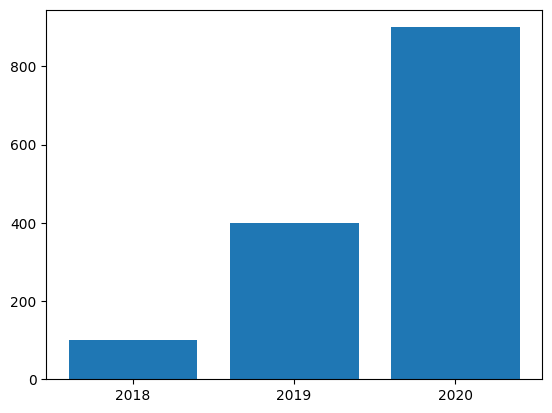

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]
plt.bar(x, values)
plt.xticks(x, years)
plt.show()

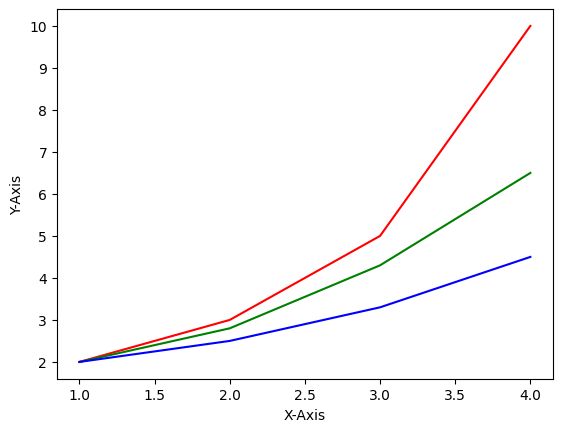

In [302]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [2.0, 3.0, 5.0, 10.0], 'r')
plt.plot([1, 2, 3, 4], [2.0, 2.8, 4.3, 6.5], 'g')
plt.plot([1, 2, 3, 4], [2.0, 2.5, 3.3, 4.5], 'b')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

In [233]:
# sp5=sp4.sort_values(by=['총인원'], axis=0,ascending=False)

In [231]:
# sp6=sp5.head(100)

In [232]:
# sp6 # 오름차순으로 100개의 데이터만 뽑은것.